In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

mnist = keras.datasets.mnist
(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()
#The dataset is structured as a tuple of NumPy arrays: x training images, y training labels, and x test images, y test labels.

11501568/11490434 [==============================] - 0s 0us/step


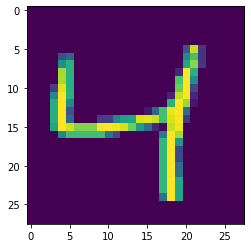

In [2]:
plt.imshow(x_train_full[2])
#It will show the 3rd training image as python indexing starts with 0.
#perform data normalization so that all input values are between 0 and 1. 
#Since a grayscale image has pixel values of 0 to 255, we divide each pixel by 255. 
#Data normalization is necessary to reduce data redundancy and improve data integrity. 
#It makes sure your data is the same throughout your project.

In [3]:
x_train_norm = x_train_full/255.                #dividing the entire dataset of 65k images by 255
x_test_norm = x_test/255.                       #dividing the entire dataset of 65k images by 255

x_valid, x_train = x_train_norm[:5000], x_train_norm[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

x_test = x_test_norm

#Training data are fed after each training in an epoch. 
#An epoch is when the entire training dataset passes through the neural network once. 

In [4]:
np.random.seed(42)
tf.random.set_seed(42)
#42 is used as random seed in ML

In [5]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
# 1 flatten layer as the input layer
# 2 dense relu layers as hidden layers 
# a dense softmax layer as the output layer

#A flattening layer flattens the input to a single-column array. It prepares the input data for the next dense layers. 
#a dense layer is a layer of parallel perceptrons.

# relu is used on hidden layers
#sigmoid and softmax are used for output. 
#Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.

In [6]:
model.summary()
#function shows the number of parameters in each layer, how the output shape changes, 
#and the total amount of parameters to be trained.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
#sgd means stochastic gradient descent – a type of gradient descent that only uses a single training example per epoch.

In [8]:
model_history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))
#accuracy = 99% using our test data

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6197 - accuracy: 0.8405 - val_loss: 0.3103 - val_accuracy: 0.9120
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2953 - accuracy: 0.9151 - val_loss: 0.2473 - val_accuracy: 0.9302
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2429 - accuracy: 0.9304 - val_loss: 0.2060 - val_accuracy: 0.9424
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2074 - accuracy: 0.9406 - val_loss: 0.1823 - val_accuracy: 0.9494
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1810 - accuracy: 0.9487 - val_loss: 0.1644 - val_accuracy: 0.9540
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1603 - accuracy: 0.9544 - val_loss: 0.1482 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1431 - accuracy: 0.9597 - val_loss: 0.1366 - val_accuracy:

In [9]:
x_sample = x_test[:5]
y_probability = model.predict(x_sample)
#took 5 images – index 0 to 4, and feed them to model

In [10]:
y_probability.round()
#returns the probability of the image

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
y_predict = model.predict(x_sample)